In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
sns.set()

## Concepts Lesson

In [2]:
temps = [80, 90]
visitors = [300, 400]

Text(85, 310, 'best guess')

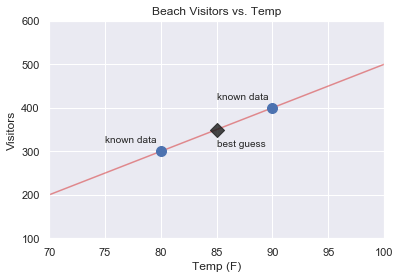

In [3]:

plt.plot([70, 100], [200, 500], c='tab:red', alpha=0.5)
plt.scatter(temps, visitors, s=100, zorder=5)
plt.scatter(85, 350, c='k', marker='D', s=100, zorder=6, alpha=0.8)
plt.xlim(70, 100)
plt.ylim(100, 600)
plt.ylabel("Visitors")
plt.xlabel("Temp (F)")
plt.title("Beach Visitors vs. Temp")
plt.annotate("known data", (75, 320))
plt.annotate("known data", (85, 420))
plt.annotate("best guess", (85, 310))

In [4]:
temps =    [72,  72,  73,  74,  77,  80,  80,  81,  82,  83,  85,  87,  87,  88,  89,  90,  90,  91,  92,  95]
visitors = [210, 150, 220, 250, 280, 300, 250, 380, 350, 320, 380, 310, 340, 410, 340, 280, 400, 390, 450, 420]


Text(0.5, 1.0, 'Beach Visitors vs. Temp')

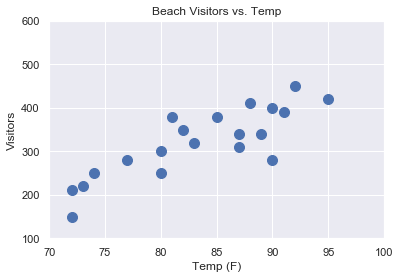

In [5]:
#plt.plot([70, 100], [180, 500], c='tab:red', ls='--', alpha=0.5)



plt.scatter(temps, visitors, s=100, zorder=5)
plt.xlim(70, 100)
plt.ylim(100, 600)
plt.ylabel("Visitors")
plt.xlabel("Temp (F)")
plt.title("Beach Visitors vs. Temp")

In [6]:
temps = np.array([temps])

temps = np.reshape(temps, (-1, 1))

In [7]:
lr = LinearRegression()
lr.fit(temps, visitors)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
b = lr.coef_

In [9]:
a = lr.intercept_

In [10]:
lr.intercept_

-457.927918570835

In [11]:
x1 = 0
y1 = a + b*x1
x2 = 100
y2 = a + b*x2

Text(0.5, 1.0, 'Beach Visitors vs. Temp')

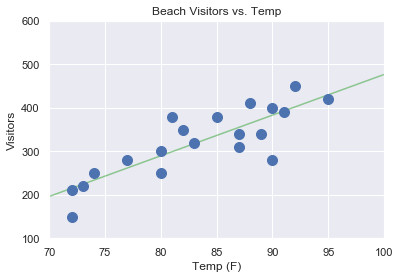

In [12]:
plt.plot([x1, x2], [y1, y2], c='tab:green', ls='-', alpha=0.5)

plt.scatter(temps, visitors, s=100, zorder=5)
plt.xlim(70, 100)
plt.ylim(100, 600)
plt.ylabel("Visitors")
plt.xlabel("Temp (F)")
plt.title("Beach Visitors vs. Temp")

Text(0.5, 1.0, 'Beach Visitors vs. Temp')

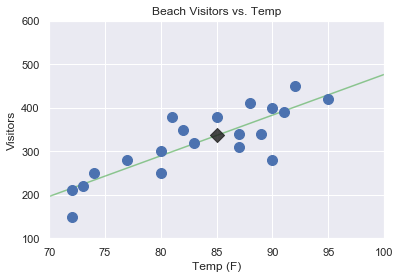

In [13]:
plt.plot([x1, x2], [y1, y2], c='tab:green', ls='-', alpha=0.5)

plt.scatter(85, 336.85, c='k', marker='D', s=100, zorder=6, alpha=0.8)


plt.scatter(temps, visitors, s=100, zorder=5)
plt.xlim(70, 100)
plt.ylim(100, 600)
plt.ylabel("Visitors")
plt.xlabel("Temp (F)")
plt.title("Beach Visitors vs. Temp")

In [14]:
y_pred = lr.predict(temps)

In [15]:
y_pred

array([214.95949314, 214.95949314, 224.30515164, 233.65081014,
       261.68778563, 289.72476111, 289.72476111, 299.07041961,
       308.41607811, 317.7617366 , 336.45305359, 355.14437059,
       355.14437059, 364.49002908, 373.83568758, 383.18134607,
       383.18134607, 392.52700457, 401.87266307, 429.90963855])

In [17]:
np.sqrt(mean_squared_error(visitors, y_pred))

42.16797650617912

In [19]:
mean_squared_error(visitors, y_pred)

1778.1382426256746

## Coding Lesson

In [20]:
base = "https://raw.githubusercontent.com/pathstream-curriculum/Python/master/"
retail_features = "retail_features_4stores.csv"
retail_sales = "retail_sales_4stores.csv"

In [21]:
retail_sales_df = pd.read_csv(base + retail_sales)
retail_features_df = pd.read_csv(base + retail_features)

In [22]:
# convert Date to datetime
retail_sales_df["Date"] = pd.to_datetime(retail_sales_df.Date)
retail_features_df["Date"] = pd.to_datetime(retail_sales_df.Date)
# convert Store and Dept to string
retail_sales_df["Store"] = retail_sales_df.Store.astype("str")
retail_sales_df["Dept"] = retail_sales_df.Dept.astype("str")
retail_features_df["Store"] = retail_features_df.Store.astype("str")

#deal with the sorting issue up front
retail_sales_df.sort_values("Date", inplace=True)
retail_features_df.sort_values("Date", inplace=True)

In [23]:
retail_sales_df.drop('Unnamed: 0', axis=1).head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,Los Angeles,Clothing,2010-01-10,27023.35,False
31,Buffalo,Jewelry,2010-01-10,6947.26,False
30,Los Angeles,Furniture,2010-01-10,12390.87,False
29,Seattle,Housewares,2010-01-10,88537.23,False
28,Las Vegas,Jewelry,2010-01-10,34912.45,False


## Narrative

You are curious which of the departments does the best job of predicting total store sales for that day. 

In [24]:
retail_sales_df.drop("Unnamed: 0", axis=1, inplace=True)

In [25]:
# let's try with Seattle
sea_sales_df = retail_sales_df.loc[retail_sales_df.Store=="Seattle"]
sea_sales_df.reset_index(inplace=True, drop=True)

In [26]:
sea_sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,Seattle,Housewares,2010-01-10,88537.23,False
1,Seattle,Shoes,2010-01-10,32910.99,False
2,Seattle,Jewelry,2010-01-10,54800.74,False
3,Seattle,Outdoor,2010-01-10,6388.40,False
4,Seattle,Electronics,2010-01-10,41979.23,False


In [27]:
# create a DataFrame with the total sales for the store, by date
sea_sales_df_all = sea_sales_df.groupby("Date").agg({"Weekly_Sales":"sum"}).reset_index()
#rename the Weekly_Sales columns to Weekly_Sales_all 
sea_sales_df_all.rename(columns={"Weekly_Sales": "Weekly_Sales_all"}, inplace=True) 

In [28]:
sea_sales_df_all.head()

,Date,Weekly_Sales_all
0,2010-01-10,339410.13
1,2010-02-04,397460.54
2,2010-02-07,342652.13
3,2010-02-19,360932.83
4,2010-02-26,332044.40


In [29]:
housewares_sales_df = sea_sales_df.loc[sea_sales_df["Dept"]=="Housewares"]
housewares_sales_df.rename(columns={"Weekly_Sales": "Weekly_Sales_hw"}, inplace=True) 
housewares_sales_df.head()

/Users/caldermyers/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Store,Dept,Date,Weekly_Sales_hw,IsHoliday
0,Seattle,Housewares,2010-01-10,88537.23,False
13,Seattle,Housewares,2010-02-04,83927.41,False
20,Seattle,Housewares,2010-02-07,86804.99,False
24,Seattle,Housewares,2010-02-19,86570.21,False
39,Seattle,Housewares,2010-02-26,84405.45,False


In [30]:
housewares_join_all = housewares_sales_df.merge(sea_sales_df_all)[["Date", "Weekly_Sales_hw", "Weekly_Sales_all"]]
housewares_join_all.head()

,Date,Weekly_Sales_hw,Weekly_Sales_all
0,2010-01-10,88537.23,339410.13
1,2010-02-04,83927.41,397460.54
2,2010-02-07,86804.99,342652.13
3,2010-02-19,86570.21,360932.83
4,2010-02-26,84405.45,332044.40


In [33]:
X = housewares_join_all["Weekly_Sales_hw"]
y = housewares_join_all["Weekly_Sales_all"]

Text(0.5, 1.0, 'Weekly Seattle Store Sales')

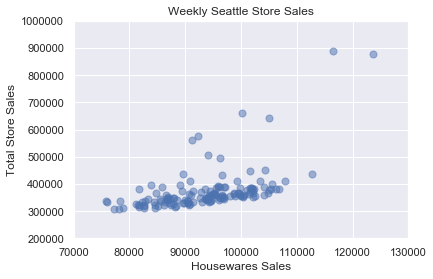

In [34]:
fig, ax = plt.subplots()
ax.scatter(housewares_join_all["Weekly_Sales_hw"], 
           housewares_join_all["Weekly_Sales_all"],
              s=50,
              alpha=0.5)
ax.set_xlim(70000, 130000)
ax.set_ylim(200000, 1000000)
ax.set_xlabel("Housewares Sales")
ax.set_ylabel("Total Store Sales")
ax.set_title("Weekly Seattle Store Sales")

In [35]:
lr_hw = LinearRegression()
X = housewares_join_all[["Weekly_Sales_hw"]]
y = housewares_join_all["Weekly_Sales_all"]

In [36]:
housewares_join_all[["Weekly_Sales_hw"]].shape

(143, 1)

In [37]:
lr_hw.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
lr_hw.coef_

array([5.43036334])

In [39]:
a, b = lr_hw.intercept_, lr_hw.coef_
a, b

(-134672.2987582083, array([5.43036334]))

In [40]:
x1 = 70000
y1 = a + b*x1
x2 = 130000
y2 = a + b*x2


Text(0.5, 1.0, 'Weekly Seattle Store Sales')

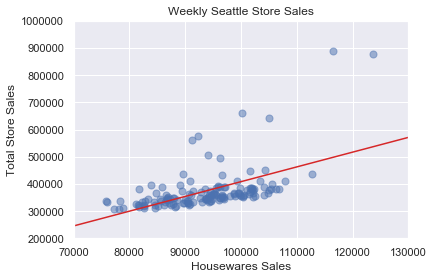

In [41]:
fig, ax = plt.subplots()
ax.scatter(housewares_join_all["Weekly_Sales_hw"], 
           housewares_join_all["Weekly_Sales_all"],
              s=50,
              alpha=0.5)
ax.plot([x1, x2], [y1, y2], c='tab:red')
ax.set_xlim(70000, 130000)
ax.set_ylim(200000, 1000000)
ax.set_xlabel("Housewares Sales")
ax.set_ylabel("Total Store Sales")
ax.set_title("Weekly Seattle Store Sales")

/Users/caldermyers/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Text(0.5, 1.0, 'Weekly Seattle Store Sales')

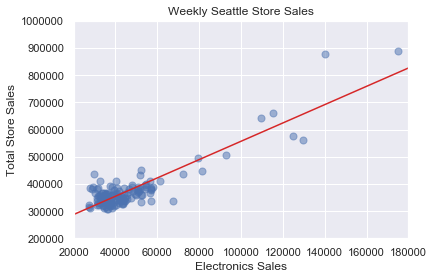

In [42]:
electronics_sales_df = sea_sales_df.loc[sea_sales_df["Dept"]=="Electronics"]
electronics_sales_df.rename(columns={"Weekly_Sales": "Weekly_Sales_elec"}, inplace=True) 
electronics_join_all = electronics_sales_df.merge(sea_sales_df_all)[["Date", "Weekly_Sales_elec", "Weekly_Sales_all"]]



lr_elec = LinearRegression()
X = electronics_join_all[["Weekly_Sales_elec"]]
y = electronics_join_all["Weekly_Sales_all"]
lr_elec.fit(X, y)
a, b = lr_elec.intercept_, lr_elec.coef_

x1 = 20000
y1 = a + b*x1
x2 = 180000
y2 = a + b*x2


fig, ax = plt.subplots()
ax.scatter(electronics_join_all["Weekly_Sales_elec"], 
           electronics_join_all["Weekly_Sales_all"],
              s=50,
              alpha=0.5)
ax.plot([x1, x2], [y1, y2], c='tab:red')
ax.set_xlim(20000, 180000)
ax.set_ylim(200000, 1000000)
ax.set_xlabel("Electronics Sales")
ax.set_ylabel("Total Store Sales")
ax.set_title("Weekly Seattle Store Sales")


In [43]:
hw_pred = lr_hw.predict(housewares_join_all[["Weekly_Sales_hw"]])
elec_pred = lr_elec.predict(electronics_join_all[["Weekly_Sales_elec"]])

In [44]:
sales_true = housewares_join_all["Weekly_Sales_all"]
print("RMSE for housewares model: ", np.sqrt(mean_squared_error(sales_true, hw_pred)))
print("RMSE for electronics model: ", np.sqrt(mean_squared_error(sales_true, elec_pred)))

RMSE for housewares model:  67638.66629858885
RMSE for electronics model:  36355.19238160198


In [45]:
sales_true = housewares_join_all["Weekly_Sales_all"]
sales_pred_hw = lr_hw.predict(housewares_join_all[["Weekly_Sales_hw"]])
mse_hw = mean_squared_error(sales_true, sales_pred_hw)
print("The RMSE for the housewares model is: ", np.sqrt(mse_hw))

The RMSE for the housewares model is:  67638.66629858885


In [46]:
sales_true = electronics_join_all["Weekly_Sales_all"]
sales_pred_elec = lr_elec.predict(electronics_join_all[["Weekly_Sales_elec"]])
mse_elec = mean_squared_error(sales_true, sales_pred_elec)
print("The RMSE for the electronics model is:", np.sqrt(mse_elec))

The RMSE for the electronics model is: 36355.19238160198


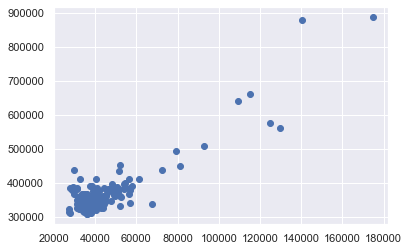

In [49]:
plt.scatter(electronics_join_all.Weekly_Sales_elec, electronics_join_all.Weekly_Sales_all)

In [50]:
toys_sales_df = sea_sales_df.loc[sea_sales_df["Dept"]=="Toys"]
toys_sales_df.rename(columns={"Weekly_Sales": "Weekly_Sales_toys"}, inplace=True) 
toys_join_all = toys_sales_df.merge(sea_sales_df_all)[["Date", "Weekly_Sales_toys", "Weekly_Sales_all"]]


/Users/caldermyers/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [51]:
toys_join_all.to_csv('toys_join_all.csv')

In [ ]:
# unfortunately, the retail features data really isn't useful :(

In [ ]:
joined_df = retail_features_df.merge(retail_sales_df, on=("Date", "Store"))

In [ ]:
joined_df_sea = joined_df.loc[joined_df.Store == "Seattle"]

In [ ]:
plt.scatter(joined_df_sea.Fuel_Price, joined_df_sea.Weekly_Sales)

In [ ]:
sns.jointplot(data=housewares_join_all, x="Weekly_Sales", y="Weekly_Sales_all")


In [ ]:
# for each department, create a DF for only that Dept. Then, join it will sea_sales_df_all
# then, create a scatterplot comparing the weekly department sales to the weekly total sales

for d in sea_sales_df["Dept"].unique():
    df_dept = sea_sales_df.loc[sea_sales_df["Dept"]==d]
    joined = df_dept.merge(sea_sales_df_all)
    print(d)
    plt.scatter(joined.Weekly_Sales, joined.Weekly_Sales_all)
    plt.show()

In [ ]:
hw_pred = lr_hw.predict(housewares_join_all[["Weekly_Sales_hw"]])
elec_pred = lr_elec.predict(electronics_join_all[["Weekly_Sales_elec"]])

In [ ]:
mean_squared_error(hw_pred, hou)

In [ ]:
for d in sea_sales_df["Dept"].unique():
    df_dept = sea_sales_df.loc[sea_sales_df["Dept"]==d]
    joined = df_dept.merge(sea_sales_df_all)
    print(d)
    sns.regplot(joined.Weekly_Sales, joined.Weekly_Sales_all)
    plt.show()

## Narrative -- the stores run promotions a few times a year. Your job is to determine
a) if promotion weeks lead to greater total sales in dollars than non-promotion weeks
b) if promotion weeks lead to a greater number of visitors to the store
c) if promotion weeks lead to a greater proportion of people making purchases

internal note: we could actually make an interesting case study that finds that customer numbers are increased, proportions are decreased, and sales are...up? down?

In [ ]:
# total sales DF 
total_sales = retail_sales_df.groupby(["Store", "Date"]).agg({"Weekly_Sales":"sum"}).reset_index()

In [ ]:
total_sales

In [ ]:
sns.violinplot(data=total_sales, x="Store", y="Weekly_Sales")

In [ ]:
# let's just do Seattle
total_sales_sea = total_sales.loc[total_sales["Store"]=="Seattle"
                            ].loc[total_sales["Date"]>pd.to_datetime('6/30/10')
                            ].loc[total_sales["Date"]<pd.to_datetime('7/1/12')]

total_sales_sea.reset_index(inplace=True)

In [ ]:
total_sales_sea_by_ws = total_sales_sea.sort_values("Weekly_Sales", ascending=False)

In [ ]:
s1 = np.random.choice(total_sales_sea_by_ws.Date[:30], 12)
s2 = np.random.choice(total_sales_sea_by_ws.Date[30:60], 10)
s3 = np.random.choice(total_sales_sea_by_ws.Date[60:], 9)
promo_dates = pd.Series(np.concatenate((s1, s2, s3)))
non_promo_dates = np.setdiff1d(total_sales_sea_by_ws.Date, promo_dates)

In [ ]:
promo_sea = total_sales_sea_by_ws.loc[total_sales_sea_by_ws["Date"].isin(promo_dates)]
non_promo_sea = total_sales_sea_by_ws.loc[total_sales_sea_by_ws["Date"].isin(non_promo_dates)]

In [ ]:
promo_sea


In [ ]:
ave_promo_spend = 200
ave_non_promo_spend = 210

sd = 20

promo_spends = np.random.normal(ave_promo_spend, sd, len(promo_sea)).round(2)
non_promo_spends = np.random.normal(ave_non_promo_spend, sd, len(non_promo_sea)).round(2)

In [ ]:
non_paying_promo = np.random.normal(1500, 400, size=len(promo_spends))
promo_sea["Num_Customers"] = ((promo_sea.Weekly_Sales / promo_spends).round().astype(int) + 
                              non_paying_promo).astype(int)

In [ ]:
non_paying_non_promo = np.random.normal(1400, 400, size=len(non_promo_spends))

non_promo_sea["Num_Customers"] = ((non_promo_sea.Weekly_Sales / non_promo_spends).round().astype(int) + 
                                  non_paying_non_promo).astype(int)


In [ ]:
promo_sea["Promo_Week"] = True
non_promo_sea["Promo_Week"] = False

promo_sea["Num_Sales"] = (promo_sea.Num_Customers - non_paying_promo).astype(int)
non_promo_sea["Num_Sales"] = (non_promo_sea.Num_Customers - non_paying_non_promo).astype(int) + 25

promo_sea["Num_Customers"] = promo_sea.Num_Customers + 10

In [ ]:
retail_promotions_df = pd.concat([promo_sea, non_promo_sea]).reset_index(drop=True).sort_values("Date")

In [ ]:
retail_promotions_df.drop(retail_promotions_df.columns[0], axis=1, inplace=True)
retail_promotions_df["Num_Visitors"] = retail_promotions_df.Num_Customers

In [ ]:
retail_promotions_df

In [ ]:
retail_promotions_df = retail_promotions_df[["Store", "Date", "Num_Visitors", "Num_Sales", "Weekly_Sales", "Promo_Week"]]

In [ ]:
retail_promotions_df

In [ ]:
retail_promotions_df["Num_Visitors"] = retail_promotions_df.Num_Visitors + 10

In [ ]:
retail_promotions_df.to_csv('retail_promotions_seattle_03.csv', index=False)

## Intermediate tweaking

In [ ]:
df = pd.read_csv('retail_promotions_seattle_01.csv')

In [ ]:
np = df.loc[df.Promo_Week == True]
p = df.loc[df.Promo_Week == False]


In [ ]:
p["Num_Visitors"] = p["Num_Visitors"] - 20

In [ ]:
df = pd.concat([np, p])

In [ ]:
df.to_csv('retail_promotions_seattle_04.csv', index=False)

In [ ]:
sum(df.Num_Visitors)

# What will this look like from the beginning?

In [ ]:
seattle_promos_df = pd.read_csv('retail_promotions_seattle.csv')

In [ ]:
seattle_promos_df.info()

In [ ]:
seattle_promos_df["Date"] = pd.to_datetime(seattle_promos_df.Date)

In [ ]:
seattle_promos_df.head()

In [ ]:
fig = plt.figure()
sns.violinplot(data=seattle_promos_df, x="Promo_Week", y="Num_Visitors")
fig.suptitle("Seattle Store Visitors") 

In [ ]:
promo_week_visitors = seattle_promos_df.loc[seattle_promos_df["Promo_Week"]==True]["Num_Visitors"]
non_promo_week_visitors = seattle_promos_df.loc[seattle_promos_df["Promo_Week"]==False]["Num_Visitors"]
ttest_ind(promo_week_visitors, non_promo_week_visitors, alternative='larger')

In [ ]:
fig = plt.figure()
sns.violinplot(data=seattle_promos_df, x="Promo_Week", y="Weekly_Sales")
fig.suptitle("Seattle Store Weekly Sales") 

In [ ]:
promo_week_sales = seattle_promos_df.loc[seattle_promos_df["Promo_Week"]==True]["Weekly_Sales"]
non_promo_week_sales = seattle_promos_df.loc[seattle_promos_df["Promo_Week"]==False]["Weekly_Sales"]
ttest_ind(promo_week_sales, non_promo_week_sales, alternative='larger')

Hypothesis Tests

1. Is there a significant difference between the number of customers in promotion weeks vs. non promotions weeks?
2. Is there a significant difference in weekly sales between promotion weeks and non-promotions weeks? 

In [ ]:
promo_weekly_sales = seattle_promos_df.loc[seattle_promos_df["Promo_Week"]==True]["Weekly_Sales"]
non_promo_weekly_sales = seattle_promos_df.loc[seattle_promos_df["Promo_Week"]==False]["Weekly_Sales"]

In [ ]:
t, p = stats.ttest_ind(promo_weekly_sales, non_promo_weekly_sales)
t, p

In [ ]:
promo_num_customers = seattle_promos_df.loc[seattle_promos_df["Promo_Week"]]["Num_Customers"]
non_promo_num_customers = seattle_promos_df.loc[~seattle_promos_df["Promo_Week"]]["Num_Customers"]

In [ ]:
stats.ttest_ind(promo_num_customers, non_promo_num_customers)

In [ ]:
promo_customer = np.random.normal(50000, 10000, len(promo_dates)).round()
non_promo_customer = np.random.normal(40000, 10000, len(non_promo_dates)).round()

In [ ]:
promo_dates = pd.Series(promo_dates)

In [ ]:
promo_df = pd.DataFrame(promo_dates)
promo_df.columns = ["Date"]
promo_df["Num_Customers"] = promo_customer
promo_df["Promo_Week"] = True
promo_df.head()

In [ ]:
non_promo_df = pd.DataFrame(non_promo_dates)
non_promo_df.columns = ["Date"]
non_promo_df["Num_Customers"] = non_promo_customer
non_promo_df["Promo_Week"] = False
non_promo_df.head()

In [ ]:
promotions_df = pd.concat([promo_df, non_promo_df]).sort_values("Date").reset_index(drop=True)
promotions_df.head()

In [ ]:
sns.violinplot(data=promotions_df, x="Promo_Week", y="Num_Customers")

Further adjustments -- let's determine the number of customers by how much the average customer spends. 

In [ ]:
ave_promo_spend = 220
ave_non_promo_spend = 200
sd = 20

promo_spends = np.random.normal(ave_promo_spend, sd, len(promo_dates)).round(2)
non_promo_spends = np.random.normal(ave_non_promo_spend, sd, len(non_promo_dates)).round(2)

In [ ]:
promo_customers = 

## Experiments: Is there a significant difference in weekly [dept] sales between the Seattle and Los Angeles stores? 

Null hypothesis: There is no significant difference between the mean weekly [dept] sales at the Seattle store and the Los Angeles store
Alternative hypothesis: There is a significant difference between the mean weekly [dept] sales at the Seattle store and the Los Angeles store

In [ ]:
# filter the DataFrames to dept+SEA and +LA. Remove data from 01/10/2012 and later so that we
# have exactly 2 years of data (currently runs from 01/10/10 to 12/10/12)
seattle_df = retail_sales_df.loc[(retail_sales_df["Store"]=="Seattle") &
                                   (retail_sales_df["Date"]<pd.to_datetime('01-10-2012'))]

la_df = retail_sales_df.loc[(retail_sales_df["Store"]=="Los Angeles") &
                                   (retail_sales_df["Date"]<pd.to_datetime('01-10-2012'))]

In [ ]:
def run_ttest(df1, df2, dept, sample_size):
    df1_filt = df1.loc[df1["Dept"]==dept]
    df2_filt = df2.loc[df2["Dept"]==dept]
    
    df1_samp = df1_filt["Weekly_Sales"].sample(sample_size)
    df2_samp = df2_filt["Weekly_Sales"].sample(sample_size)
    
    return stats.ttest_ind(df1_samp, df2_samp)

In [ ]:
np.random.seed(42)
for d in retail_sales_df.Dept.unique():
    for _ in range(20):
        ct=0
        type_2 = p
        t, p = run_ttest(seattle_df, seattle_df, d, 15)
        if p>0.05:
            type_2+=1
        ct+=1
    print(type_2/ct)
    print ('')


In [ ]:
np.random.seed(24)
for d in retail_sales_df.Dept.unique():
    print(d, run_ttest(seattle_df, la_df, d, 100))
    print ('')


In [ ]:
cts = []
for i in range(20):
    ct=0
    for j in range(20):
        t, p = run_ttest(seattle_df, seattle_df, d, 15)
        if p<0.05:
            ct+=1
    cts.append(ct)

print(cts)
print ('')

In [ ]:
# now take a sample of 15 data points from each of the "weekly_sales" columns
np.random.seed(2)
sea_sample = seattle_shoes["Weekly_Sales"].sample(30)
la_sample = la_shoes["Weekly_Sales"].sample(30)

In [ ]:
sea_sample

In [ ]:
la_sample

In [ ]:
stats.ttest_ind(sea_sample, la_sample)

In [ ]:
sns.distplot(sea_sample)
sns.distplot(la_sample)

In [ ]:
# filter the DataFrames to shoes+SEA and shoes+LA. Remove data from 01/10/2012 and later so that we
# have exactly 2 years of data (currently runs from 01/10/10 to 12/10/12)
seattle_jewelry = retail_sales_df.loc[(retail_sales_df["Store"]=="Seattle") &
                                   (retail_sales_df["Dept"]=="Jewelry") &
                                   (retail_sales_df["Date"]<pd.to_datetime('01-10-2012'))]

la_jewelry = retail_sales_df.loc[(retail_sales_df["Store"]=="Los Angeles") &
                                   (retail_sales_df["Dept"]=="Jewelry") &
                                   (retail_sales_df["Date"]<pd.to_datetime('01-10-2012'))]

In [ ]:
# now take a sample of 15 data points from each of the "weekly_sales" columns
np.random.seed(2)
sea_sample = seattle_jewelry["Weekly_Sales"].sample(30)
la_sample = la_jewelry["Weekly_Sales"].sample(30)

In [ ]:
stats.ttest_ind(sea_sample, la_sample)

In [ ]:
def run_ttest(df1, df2, dept):
    
    

In [ ]:
retail_sales_elec = retail_sales_df.loc[retail_sales_df["Dept"] == "Electronics"]

In [ ]:
plt.hist(retail_sales_elec["Weekly_Sales"])

In [ ]:
retail_sales_elec.sort_values("Weekly_Sales", ascending=False)

In [ ]:
retail_sales_elec_la = retail_sales_elec.loc[retail_sales_elec["Store"] == "Los Angeles"]

In [ ]:
retail_sales_elec_la.sort_values("Weekly_Sales", ascending=False)[:20]

In [ ]:
len(retail_sales_elec_la)

In [ ]:
# 15 from the first 50, 10 from the next 50, 5 from the last few

In [ ]:
s1 = np.random.choice(retail_sales_elec_la.index[:50], 15)
s2 = np.random.choice(retail_sales_elec_la.index[50:100], 10)
s3 = np.random.choice(retail_sales_elec_la.index[100:], 5)

In [ ]:
promo_indexes = pd.Series(np.concatenate((s1, s2, s3)))

In [ ]:
thirty_trues

In [ ]:
promo_indexes

In [ ]:
retail_joined_df = retail_features_df.merge(retail_sales_df, on=["Store", "Date"])
retail_joined_df_jwl = retail_joined_df.loc[retail_joined_df["Dept"] == "Jewelry"]
retail_joined_df_jwl.drop("IsHoliday_y", axis=1, inplace=True)